In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import datasets
from sklearn.metrics import mean_squared_error

In [4]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Select the second feature corresponding to the bmi of the diabetes patients
X=X[:,2].reshape((len(y),1))
y = y.reshape((len(y),1))

# Split the data into training/testing sets
X = X[:-100]          # use all but the last 100 data for training
X_test = X[-100:]     # use the last 100 data for testing 

# Split the targets into training/testing sets
y = y[:-100]         # use all but the last 100 data for training
y_test = y[-100:]    # use the last 100 data for testing 
dim = len(y)
print("There are "+str(dim)+" instances in this dataset.")

There are 342 instances in this dataset


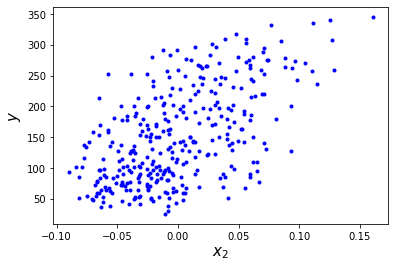

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_2$", fontsize=15)
plt.ylabel("$y$", fontsize=15)
plt.show()

## Linear regression with the normal equation

In [4]:
# Add a column of '1' vector to the X matrix
X_exp = np.c_[np.ones((dim, 1)), X]

theta = np.linalg.inv(X_exp.T.dot(X_exp)).dot(X_exp.T).dot(y)
y_predict = X_exp.dot(theta)

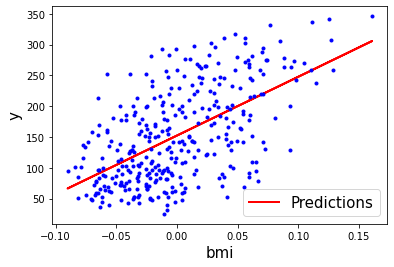

In [5]:
# Plot the regression results
plt.plot(X, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("bmi", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.show()

## Linear regression using batch gradient descent

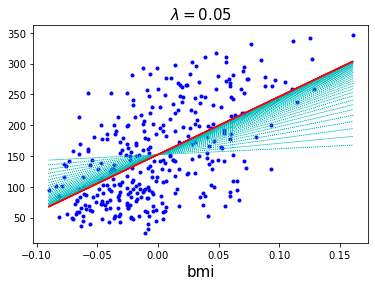

In [6]:
lbda = 0.05   # set the learning rate

theta = np.random.randn(2,1)   # initialize theta
#theta[1,:]=0

plt.plot(X, y, "b.")

n_iterations = 20000   # Maximum iteration numbers

for iteration in range(n_iterations):
    if iteration%500 == 0 and iteration > 10:
        y_predict = X_exp.dot(theta)
        plt.plot(X, y_predict, "c:", linewidth=0.8 )    
    gradient = 2/dim * X_exp.T.dot(X_exp.dot(theta) - y)
    theta = theta - lbda * gradient
    
y_predict = X_exp.dot(theta)

plt.plot(X, y_predict, "r-")
plt.xlabel("bmi", fontsize=15)  
plt.title(r"$\lambda = {}$".format(lbda), fontsize=15)
plt.show()

In [7]:
# define a function to perform the  gradient descent and plotting tasks

def plot_gradient_descent(theta, lbda):
    plt.plot(X, y, "b.")
    n_iterations = 20000
    thetas = []            # collection of all theta values over the iterations
    
    for iteration in range(n_iterations):
        if iteration%500 == 0 and iteration >0:
            y_predict = X_exp.dot(theta)
            plt.plot(X, y_predict, "c:", linewidth=0.8 )    
        gradient = 2/dim * X_exp.T.dot(X_exp.dot(theta) - y)
        theta = theta - lbda * gradient
        thetas.append(theta)
        
    y_predict = X_exp.dot(theta)
    plt.plot(X, y_predict, "r-")
    plt.xlabel("bmi", fontsize=15)
    
    plt.title(r"$\lambda = {}$".format(lbda), fontsize=15)
    return thetas

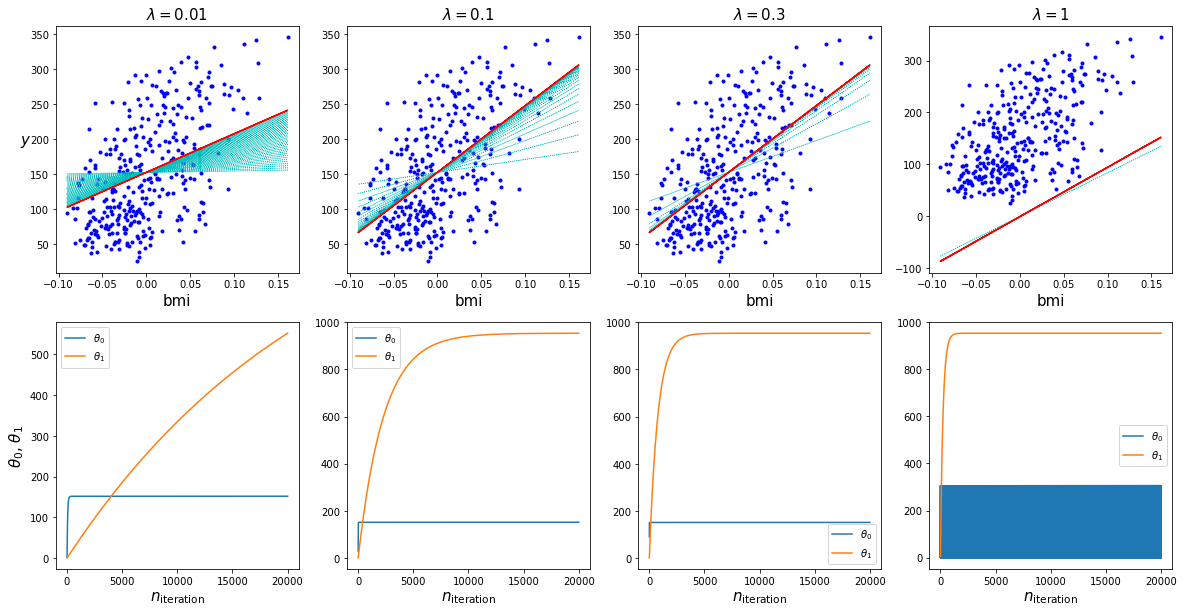

In [8]:
# Initialize theta
theta = np.random.randn(2,1)

plt.figure(figsize=(20,10))

plt.subplot(241)
plt.ylabel("$y$", rotation=0, fontsize=15)
predictions_010 = plot_gradient_descent(theta, lbda=0.01)
plt.subplot(242)
predictions_100 = plot_gradient_descent(theta, lbda=0.1)
plt.subplot(243)
predictions_300 = plot_gradient_descent(theta, lbda=0.3)
plt.subplot(244)
predictions_1000 = plot_gradient_descent(theta, lbda=1)

plt.subplot(245)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
plt.ylabel("$\\theta_0$, $\\theta_1$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_010])
theta1, = plt.plot([i[1] for i in predictions_010])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])
plt.subplot(246)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_100])
theta1, = plt.plot([i[1] for i in predictions_100])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])
plt.subplot(247)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_300])
theta1, = plt.plot([i[1] for i in predictions_300])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])
plt.subplot(248)
plt.xlabel("$n_{\mathrm{iteration}}$", fontsize=15)
theta0, = plt.plot([i[0] for i in predictions_1000])
theta1, = plt.plot([i[1] for i in predictions_1000])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])

plt.show()

## Stochastic Gradient Descent

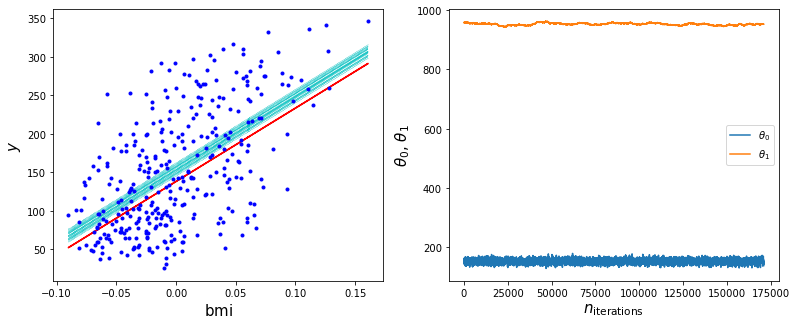

In [26]:
# Stochastic Gradient Descent

n_epochs = 500   # number of epochs

lbda = 0.01   # set the learning rate
        
thetas = []

plt.figure(figsize=(13, 5))
plt.subplot(121)

# loop over the number of epochs
for epoch in range(n_epochs):
    # And a loop over the size of the training data
    for i in range(dim):
        # Pick a random data instance as xi, yi
        random_index = np.random.randint(dim)
        xi = X_exp[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        # Calculate gradients based on this data instance
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - lbda * gradients
        thetas.append(theta)
    # plot a line for every few epochs
    if epoch%20 == 0:
        y_predict = X_exp.dot(theta)
        plt.plot(X, y_predict, "c:", linewidth=0.5 )    

y_predict = X_exp.dot(theta)

plt.plot(X, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$\mathrm{bmi}$", fontsize=15)
plt.ylabel("$y$", fontsize=15)

plt.subplot(122)
theta0, = plt.plot([i[0] for i in thetas])
theta1, = plt.plot([i[1] for i in thetas])
plt.legend([theta0, theta1],["$\\theta_0$", "$\\theta_1$"])

plt.xlabel("$n_{\mathrm{iterations}}$", fontsize=15)
plt.ylabel("$\\theta_0$, $\\theta_1$", fontsize=15)
plt.show()

## Linear Regression with Ridge/LASSO Regularization

In [8]:
# Prepare the training and testing datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Add a column of '1' vector to the X matrix
X_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_test = np.c_[np.ones((len(X_test), 1)), X_test]

# Estimate theta values
theta = np.linalg.inv(np.transpose(X_train).dot(X_train)).dot(X_train.T).dot(y_train)

# Check the performance on the test dataset
y_predict = X_test.dot(theta)
mse_linreg = mean_squared_error(y_predict, y_test)
print("MSE = %s" % mse_linreg)

MSE = 5366.446329251444


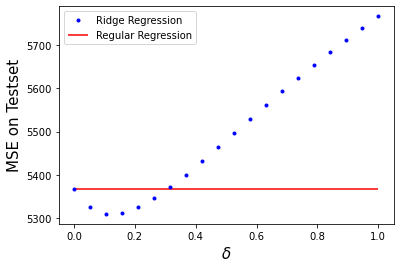

In [9]:
# Ridge Regression

thetas_r = []
mses = []
deltas = np.linspace(0, 1, 20)

for delta in deltas:
    # Compute estimators
    theta = np.linalg.inv(X_train.T.dot(X_train)+delta*np.eye(np.shape(X_train)[1])).dot(X_train.T).dot(y_train)
    thetas_r.append(theta)
    # Compute their MSE
    mses.append(mean_squared_error(X_test.dot(theta), y_test))
    
plt.plot(deltas,mses,'b.', label="Ridge Regression")
plt.hlines(mse_linreg, 0, 1, "r", label="Regular Regression")
plt.xlabel("$\delta$", fontsize=15)
plt.ylabel("MSE on Testset", fontsize=15)
plt.legend()
plt.show()

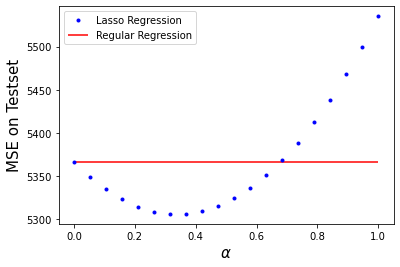

In [10]:
# Lasso Regression

from sklearn.linear_model import Lasso
thetas_l = []
mses = []
alphas = np.linspace(0.00001, 1, 20)

for alpha in alphas:
    lasso_reg = Lasso(alpha)
    # Compute estimators
    lasso_reg.fit(X_train, y_train)
    thetas_l.append(lasso_reg.coef_)
    # Compute their MSE
    mses.append(mean_squared_error(lasso_reg.predict(X_test), y_test))
    
plt.plot(alphas,mses,'b.', label="Lasso Regression")
plt.hlines(mse_linreg, 0, 1, "r", label="Regular Regression")
plt.xlabel(r"$\alpha$", fontsize=15)
plt.ylabel("MSE on Testset", fontsize=15)
plt.legend()
plt.show()